# Explore here

In [33]:
import pandas as pd

total_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head ()
#total_data.to_csv("../data/raw/total_data.csv", index = False)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [34]:
#### dimensiones del dataframe
total_data.shape
##### datos null y tipo de datos que hay en mi dataframe
total_data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [35]:
##### Para ver falta de data
total_data.isnull().sum ()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [36]:
###duplicados
total_data.drop("host_id", axis = 1).duplicated().sum()
print(f"The number of duplicated Host ID records is: {total_data['host_id'].duplicated().sum()}")
print(f"The number of duplicated Host ID records is: {total_data['id'].duplicated().sum()}")

The number of duplicated Host ID records is: 11438
The number of duplicated Host ID records is: 0


In [37]:
######Eliminar información irrelevante
total_data.drop(["id", "host_id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


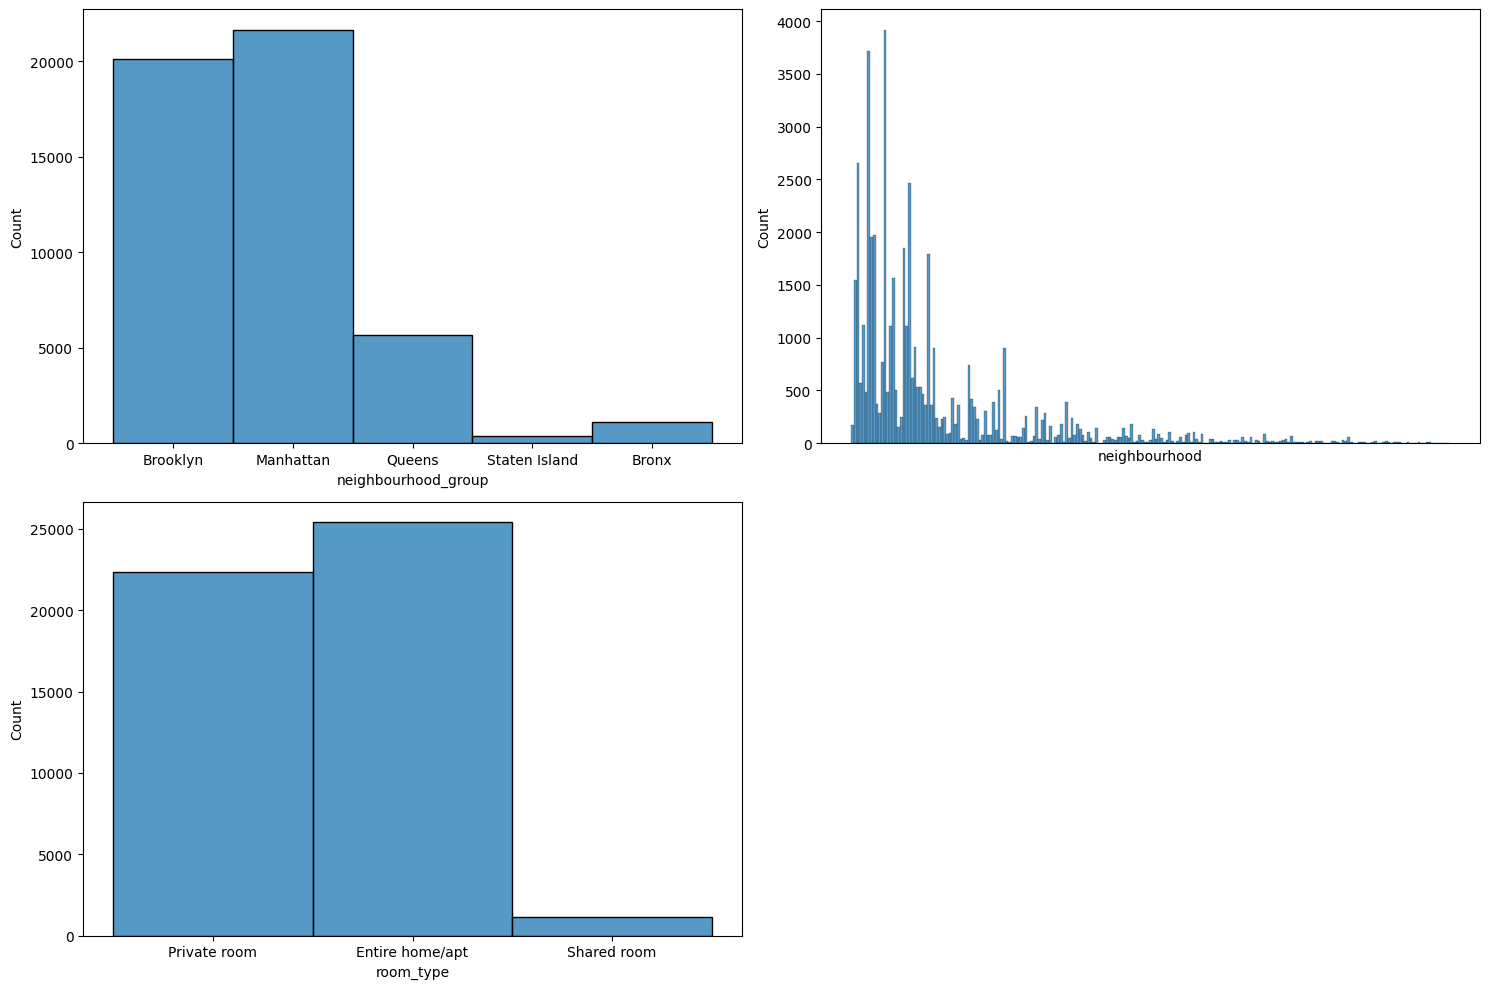

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns


fig, axis = plt.subplots(2, 2, figsize = (15, 10))

# Crear un histograma múltiple

sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type")
fig.delaxes(axis[1, 1])

#para rotar los nombres de los ejes x
#for ax in axis.flat:
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#bins para hacer un zoom al gráfico. 

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

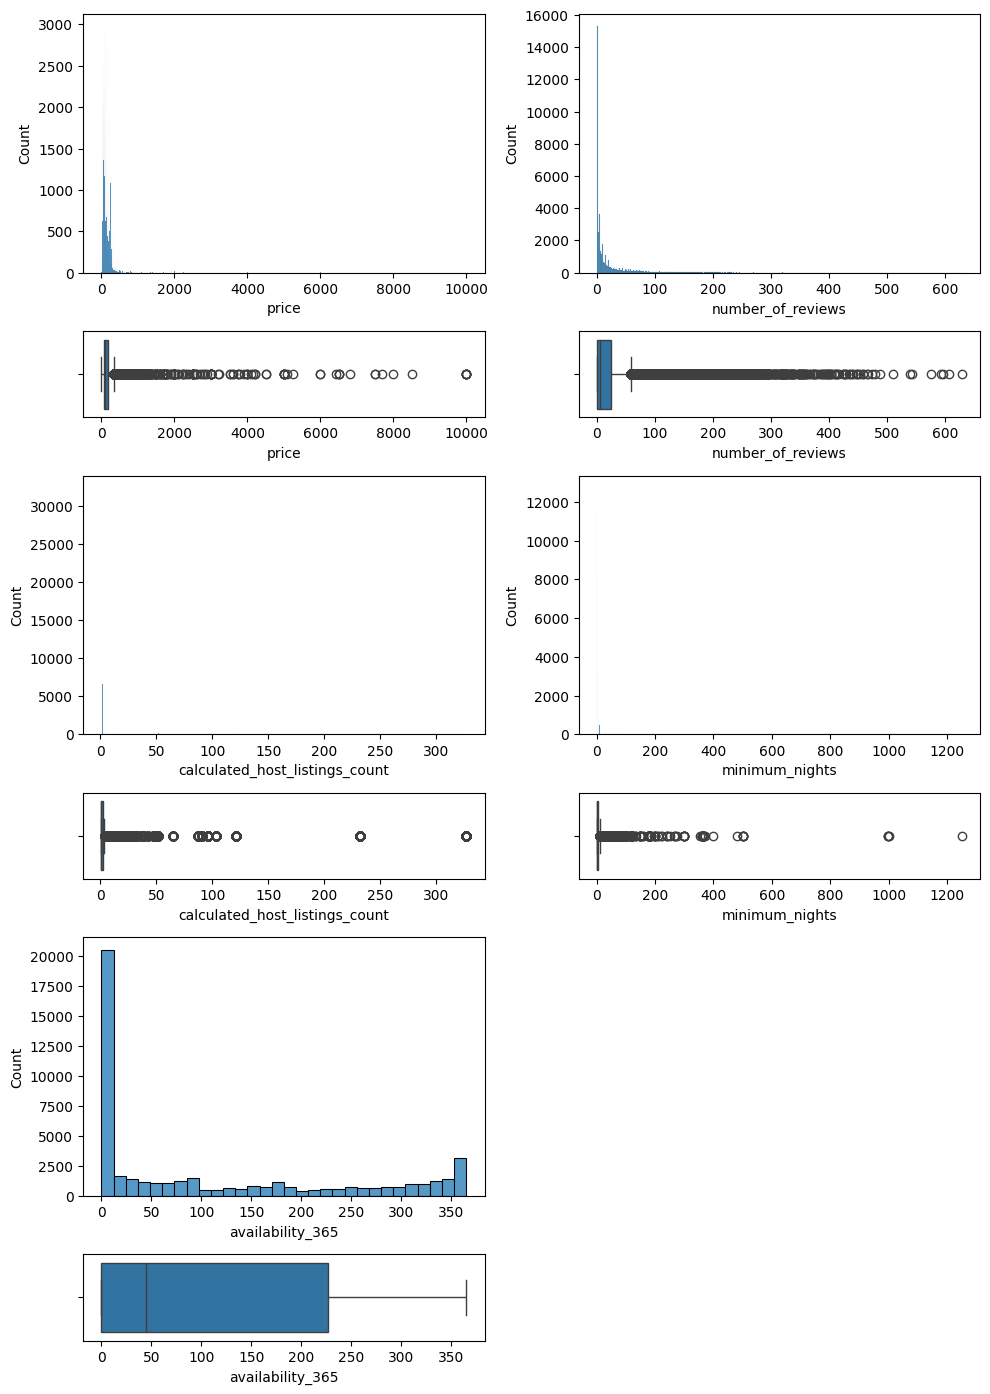

In [39]:
fig, axis = plt.subplots(6, 2, figsize=(10, 14), gridspec_kw={'height_ratios': [3, 1, 3, 1,3,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax=axis[0, 1], data=total_data, x="number_of_reviews")
sns.boxplot(ax=axis[1, 1], data=total_data, x="number_of_reviews")

sns.histplot(ax=axis[2, 0], data=total_data, x="calculated_host_listings_count")
sns.boxplot(ax=axis[3, 0], data=total_data, x="calculated_host_listings_count")

sns.histplot(ax=axis[2, 1], data=total_data,x="minimum_nights")
sns.boxplot(ax=axis[3, 1], data=total_data, x="minimum_nights")

sns.histplot(ax=axis[4, 0], data=total_data, x="availability_365")
sns.boxplot(ax=axis[5, 0], data=total_data, x="availability_365")

fig.delaxes(axis[4, 1])
fig.delaxes(axis[5, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



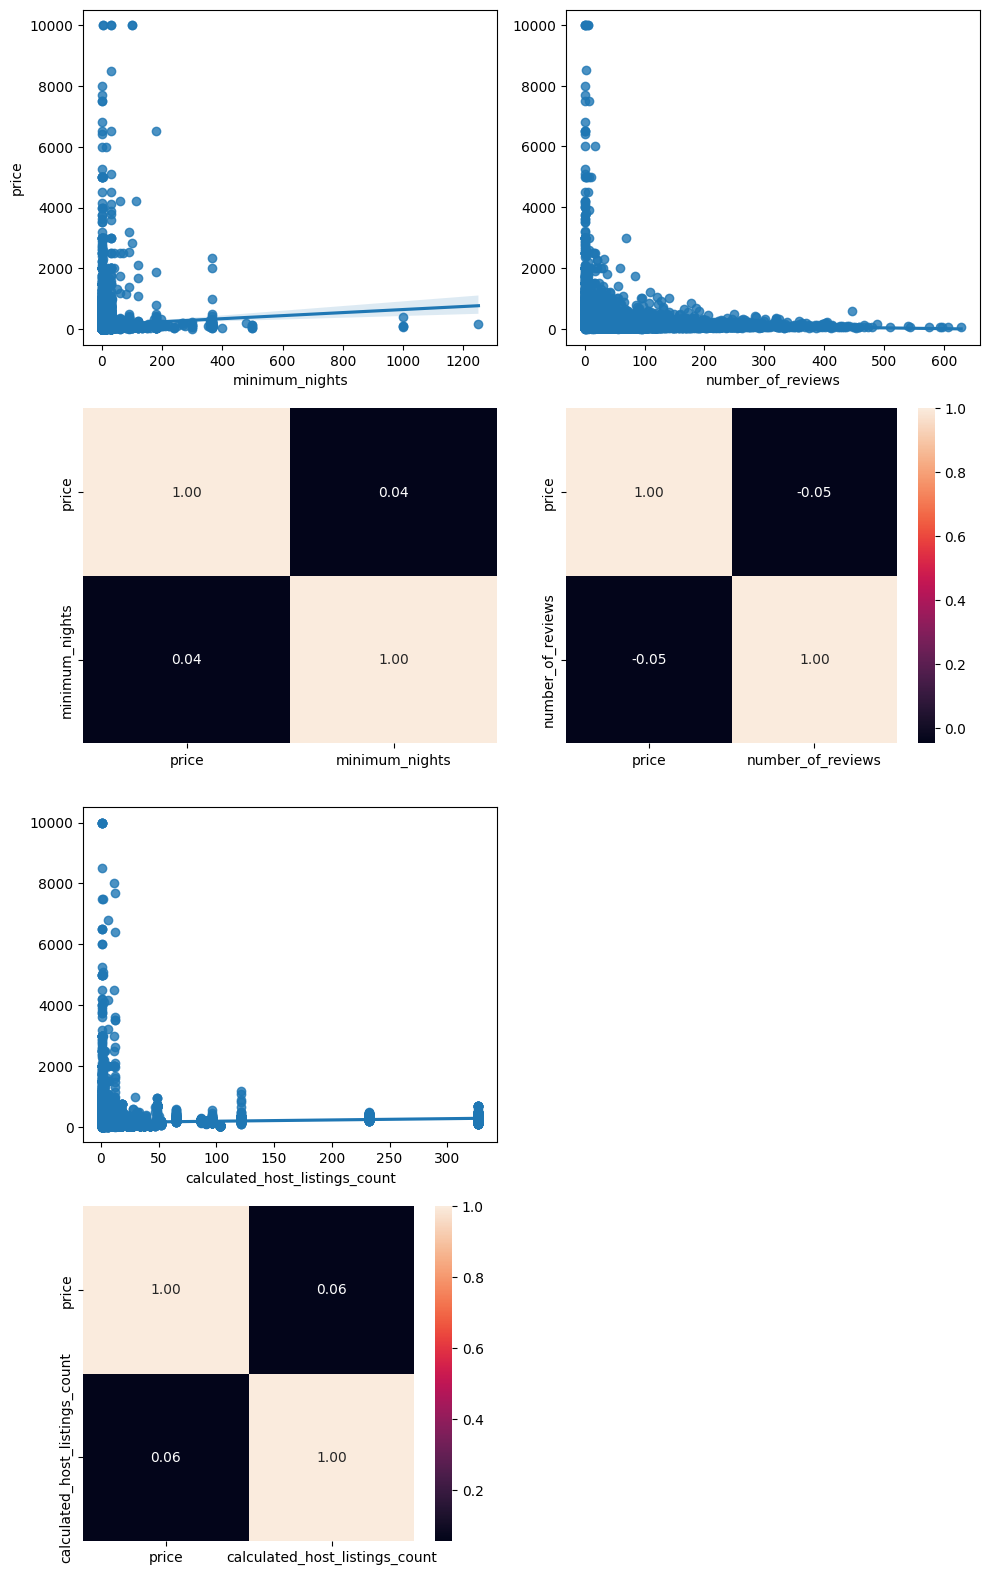

In [40]:
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel=None)


fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

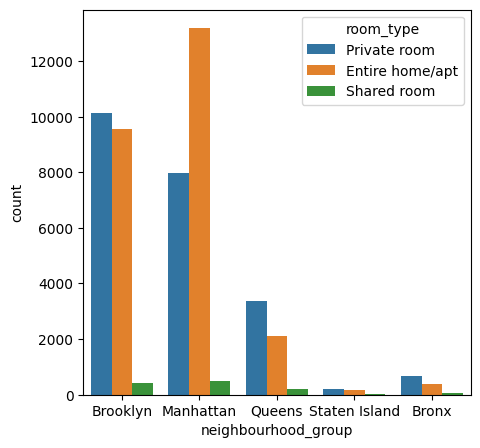

In [41]:
fig, axis = plt.subplots(figsize = (5, 5))

sns.countplot(data = total_data, x = "neighbourhood_group", hue = "room_type")
# Mostrar el plot
plt.show()

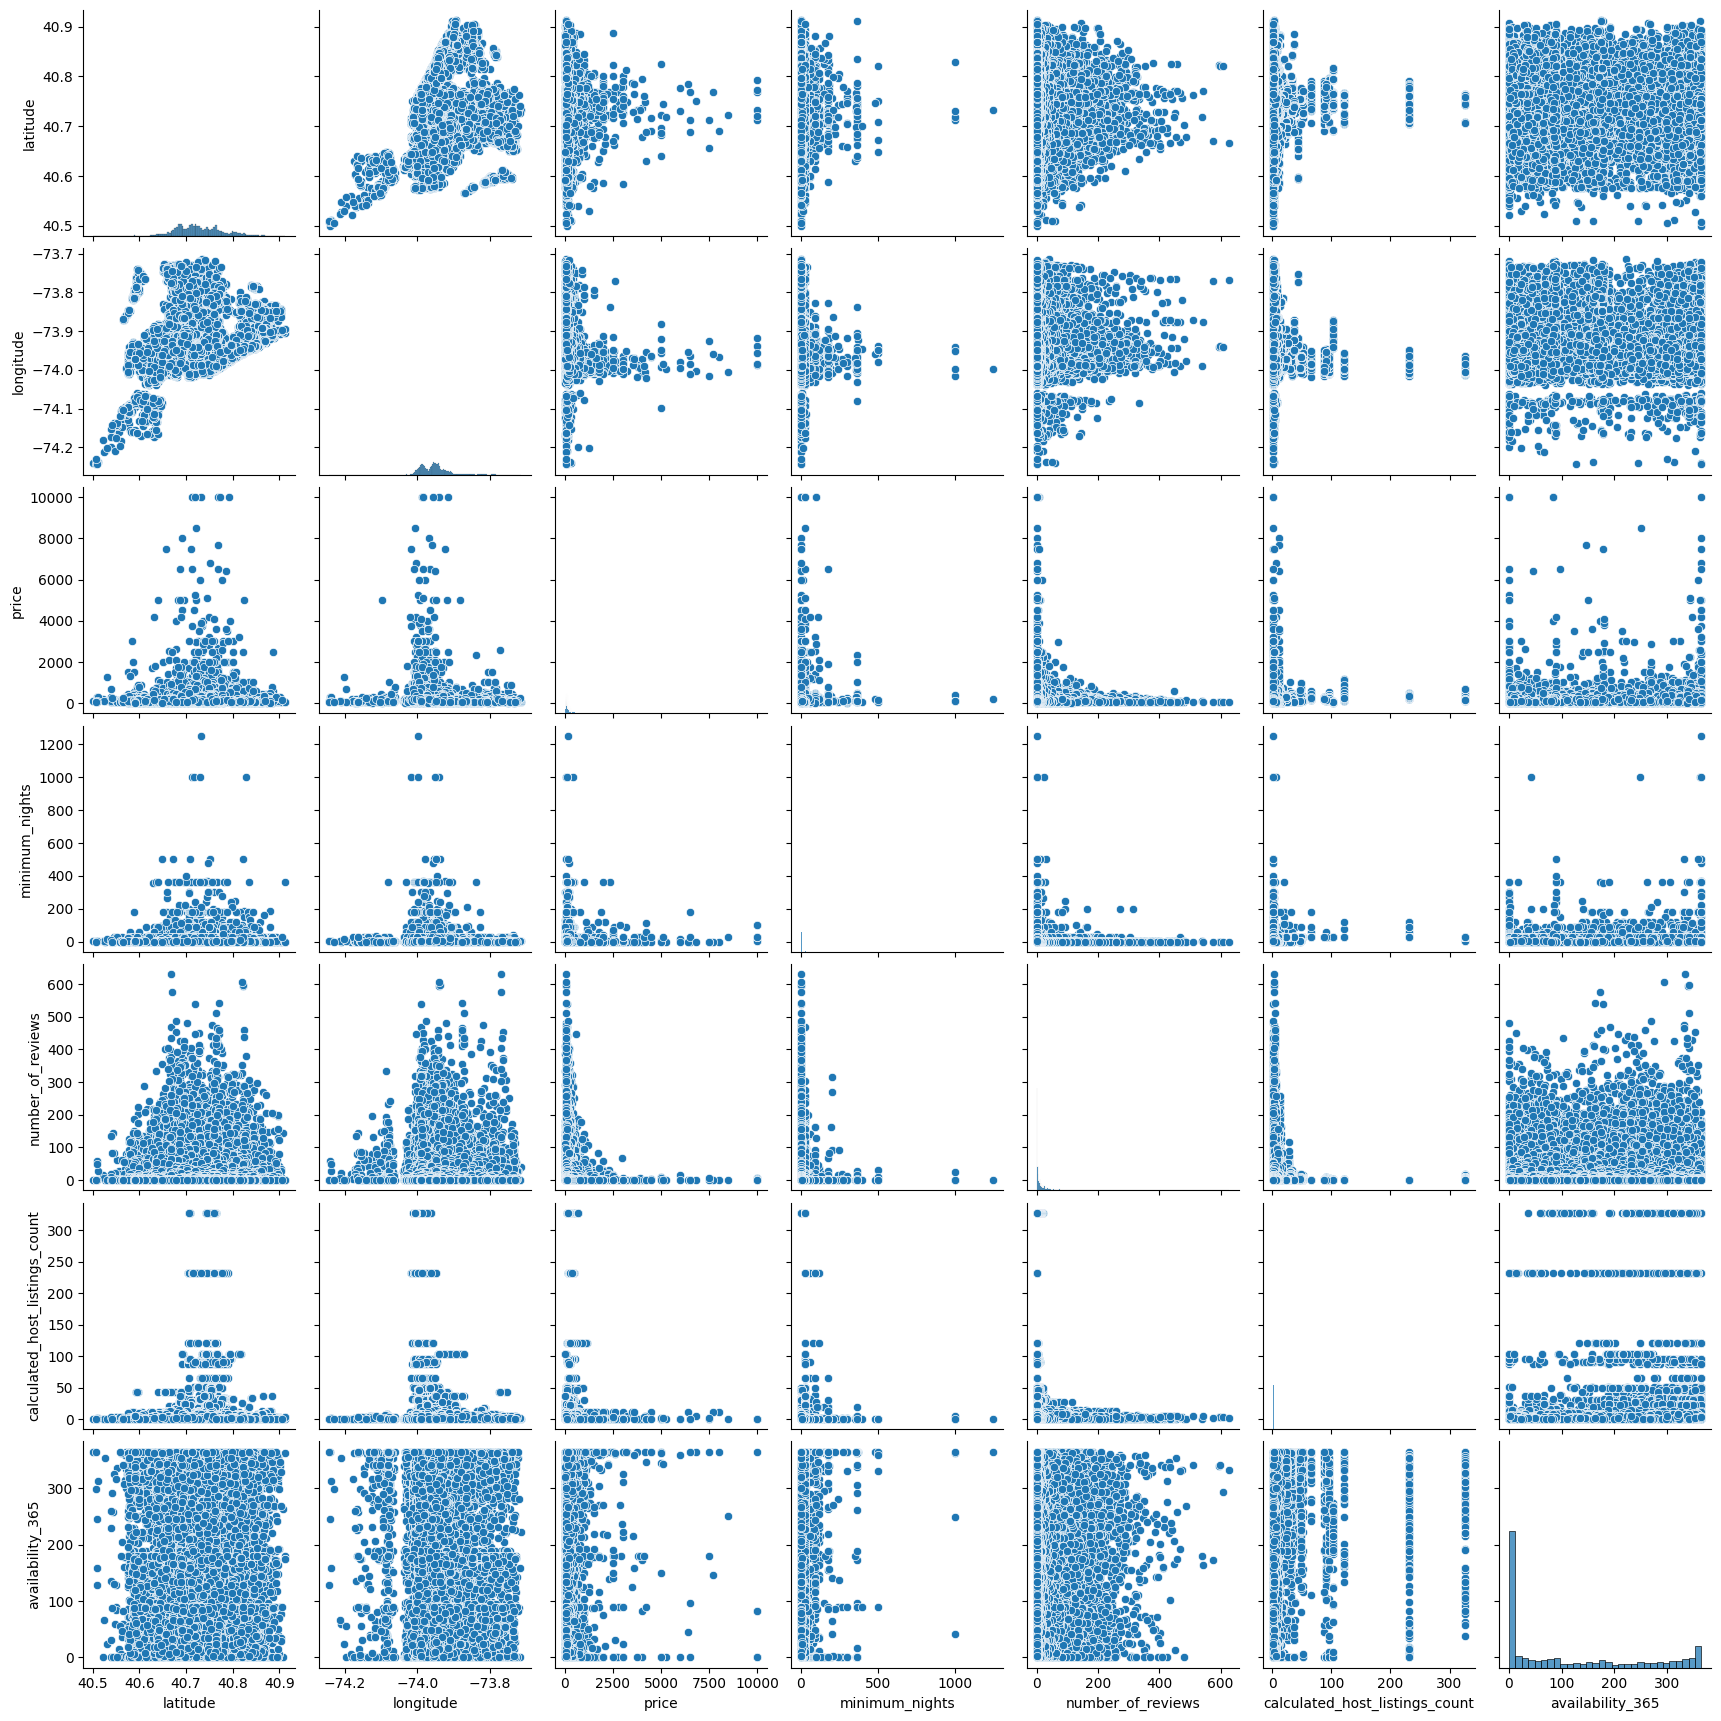

In [42]:
sns.pairplot(data = total_data)

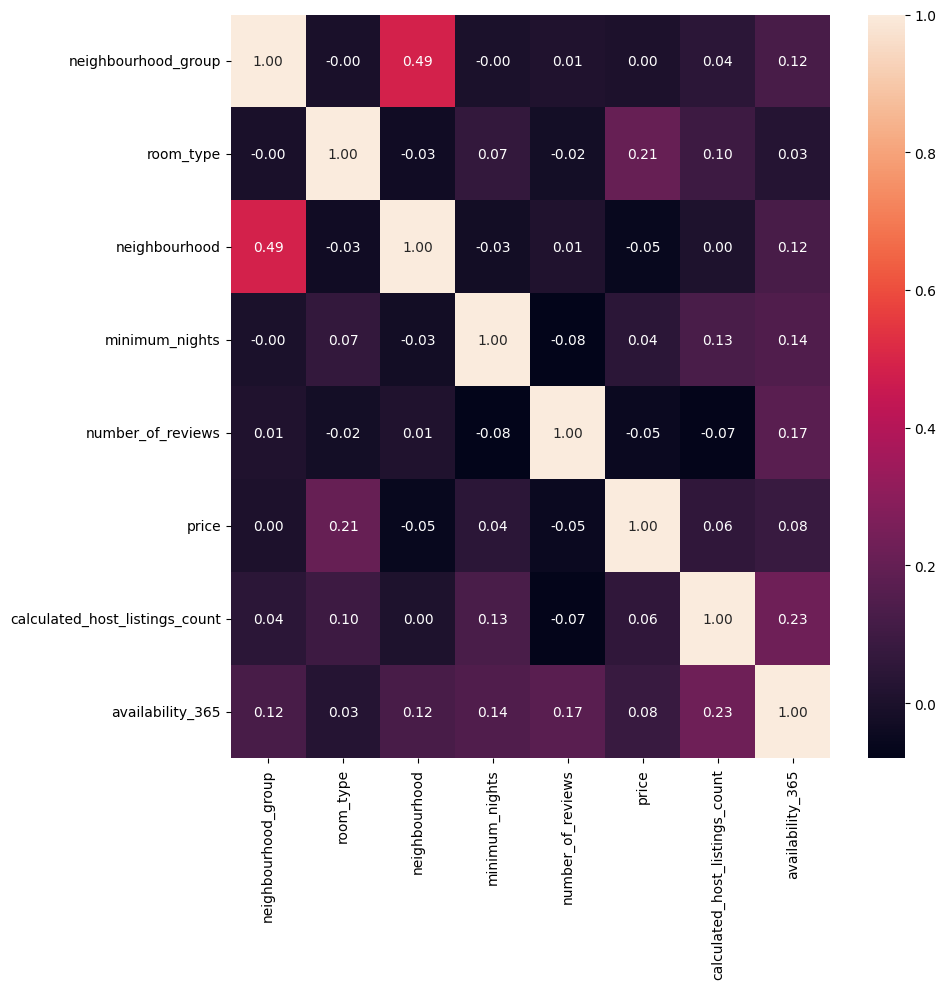

In [43]:
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(total_data[["neighbourhood_group","room_type", "neighbourhood","minimum_nights", "number_of_reviews", "price","calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [44]:
total_data.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


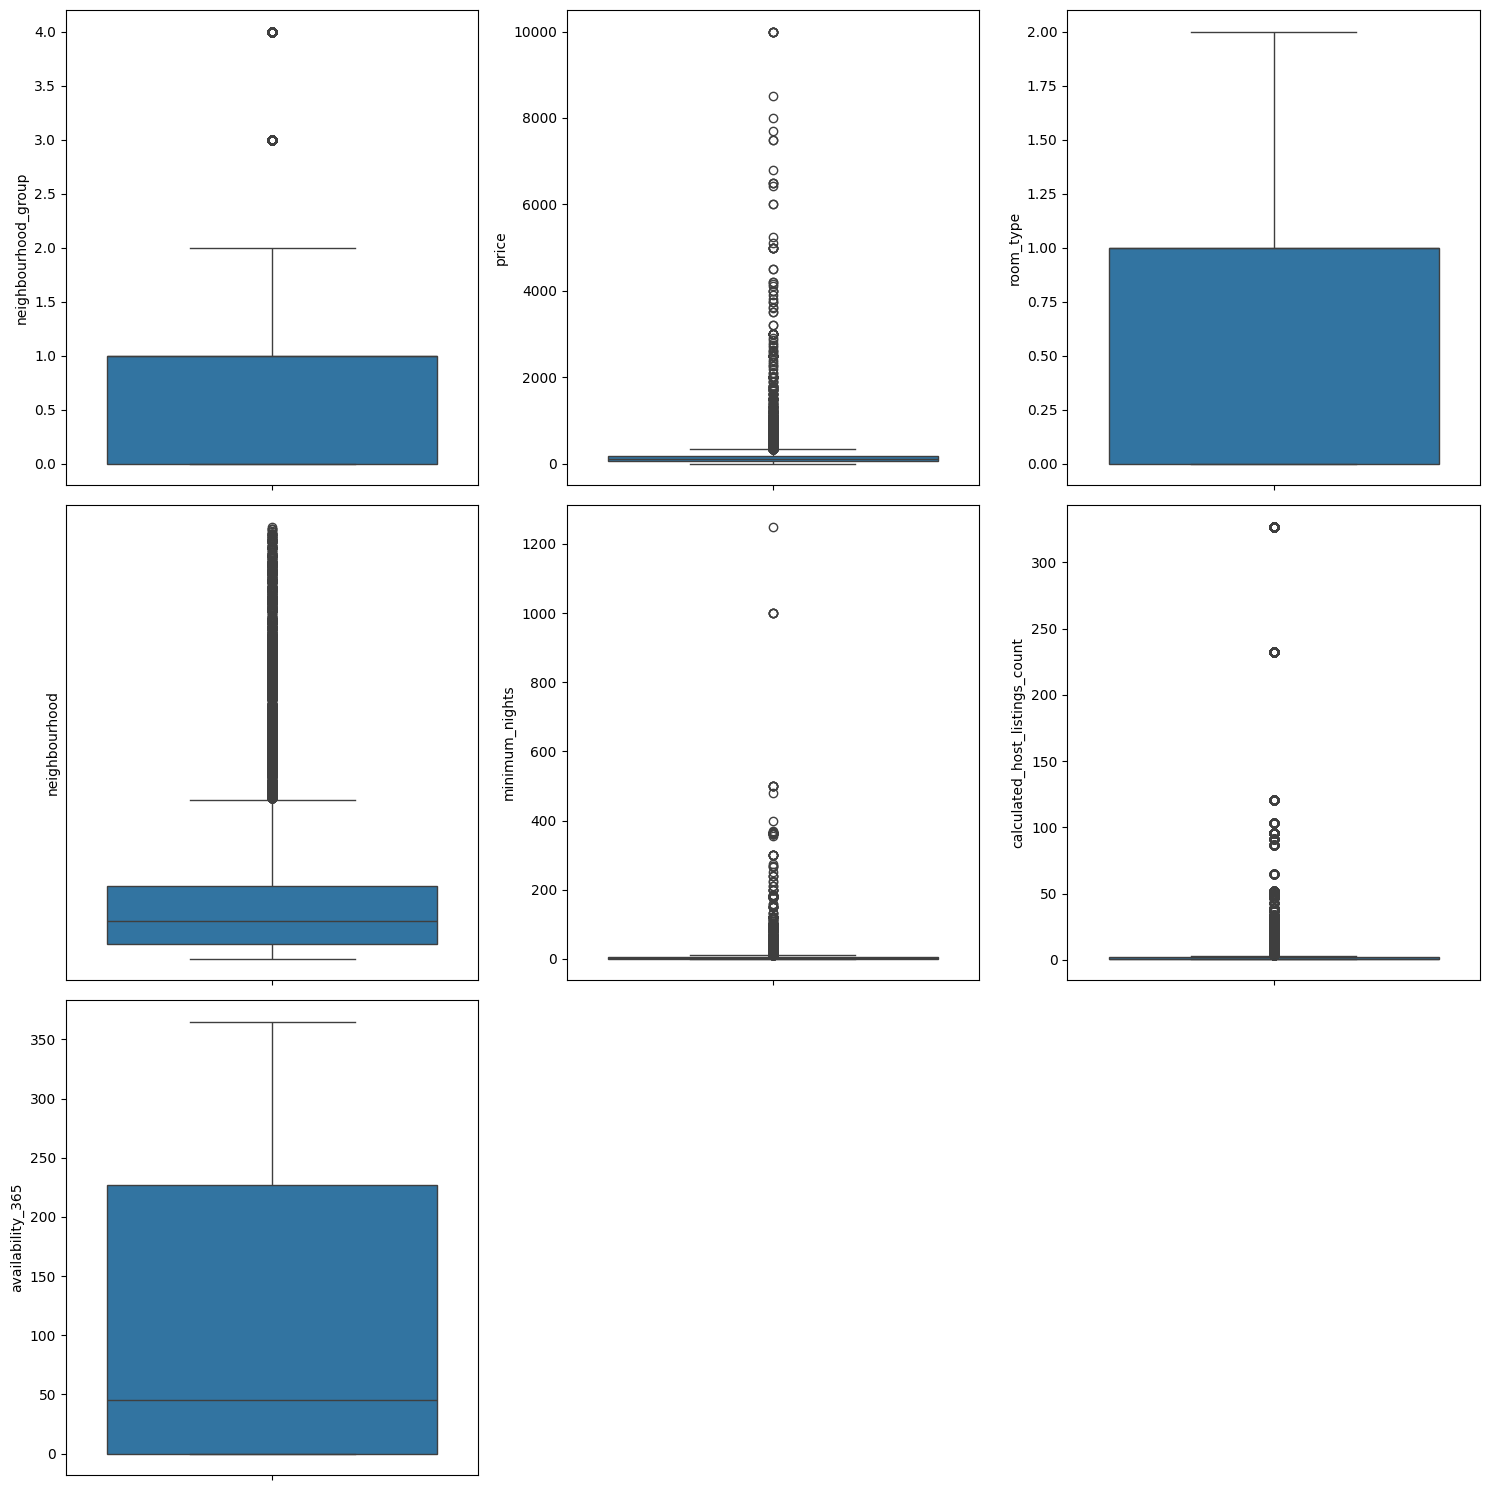

In [64]:
fig, axis = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axis[0, 2], data = total_data, y = "room_type")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "neighbourhood").set_yticks([])
sns.boxplot(ax = axis[1, 1], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "availability_365")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])


plt.tight_layout()

plt.show()

In [46]:
price = total_data["price"].describe()
price

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [47]:
price_iqr = price["75%"] - price["25%"]
upper_limit = price["75%"] + 1.5 * price
lower_limit = price["25%"] - 1.5 * price

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son count    73517.50
mean       404.08
std        535.23
min        175.00
25%        278.50
50%        334.00
75%        437.50
max      15175.00
Name: price, dtype: float64 y count   -73273.50
mean      -160.08
std       -291.23
min         69.00
25%        -34.50
50%        -90.00
75%       -193.50
max     -14931.00
Name: price, dtype: float64, con un rango intercuartílico de 106.0


In [48]:
total_data[total_data["price"] > 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,70,2,0,2,9
48891,0,21,40.70184,-73.93317,0,40,4,0,2,36
48892,1,2,40.81475,-73.94867,1,115,10,0,1,27
48893,1,7,40.75751,-73.99112,2,55,1,0,6,2


In [49]:

minimum_nights= total_data["minimum_nights"].describe()
minimum_nights



count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [50]:
minimum_iqr = minimum_nights["75%"] - minimum_nights["25%"]
upper_limit = minimum_nights["75%"] + 1.5 * minimum_nights
lower_limit = minimum_nights["25%"] - 1.5 * minimum_nights

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(minimum_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son count    73347.50
mean        15.54
std         35.77
min          6.50
25%          6.50
50%          9.50
75%         12.50
max       1880.00
Name: minimum_nights, dtype: float64 y count   -73341.50
mean        -9.54
std        -29.77
min         -0.50
25%         -0.50
50%         -3.50
75%         -6.50
max      -1874.00
Name: minimum_nights, dtype: float64, con un rango intercuartílico de 4.0


In [51]:
total_data[total_data["minimum_nights"] <= 20]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,0,6,40.67853,-73.94995,0,70,2,0,2,9
48891,0,21,40.70184,-73.93317,0,40,4,0,2,36
48892,1,2,40.81475,-73.94867,1,115,10,0,1,27
48893,1,7,40.75751,-73.99112,2,55,1,0,6,2


In [52]:
listings_count= total_data["calculated_host_listings_count"].describe()
listings_count

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [53]:
listings_count_iqr = listings_count["75%"] - listings_count["25%"]
upper_limit = listings_count["75%"] + 1.5 *listings_count
lower_limit =listings_count["25%"] - 1.5 *listings_count

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(listings_count_iqr, 2)}")


Los límites superior e inferior para la búsqueda de outliers son count    73344.50
mean        12.72
std         51.43
min          3.50
25%          3.50
50%          3.50
75%          5.00
max        492.50
Name: calculated_host_listings_count, dtype: float64 y count   -73341.50
mean        -9.72
std        -48.43
min         -0.50
25%         -0.50
50%         -0.50
75%         -2.00
max       -489.50
Name: calculated_host_listings_count, dtype: float64, con un rango intercuartílico de 1.0


In [54]:
### Missing value

#total_data.isnull().sum().sort_values(ascending=False)

#podemos dividir ese resultado por la longitud de nuestro DataFrame (número de filas) para obtener el porcentaje de valores faltantes en cada columna

total_data.isnull().sum().sort_values(ascending=False) / len(total_data)


neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [55]:
import pandas as pd
print(total_data.columns)
total_data.dtypes


Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


neighbourhood_group                 int64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                           int64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [56]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group","room_type", "neighbourhood","minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# We divide the dataset into training and test samples
X = total_data.drop('price', axis = 1)[num_variables]
y = total_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()



,neighbourhood_group,room_type,neighbourhood,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0,1,12,3,11,1,1
23615,1,0,30,2,2,1,0
31183,0,0,6,2,0,2,0
29260,0,1,6,3,87,1,267
7275,2,0,31,5,13,1,0


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group,room_type,neighbourhood,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,-0.931915,0.798949,-0.514100,-0.193025,-0.277198,-0.186570,-0.852862
23615,0.256169,-1.050482,0.005517,-0.239596,-0.479451,-0.186570,-0.860447
31183,-0.931915,-1.050482,-0.687306,-0.239596,-0.524396,-0.156424,-0.860447
29260,-0.931915,0.798949,-0.687306,-0.193025,1.430714,-0.186570,1.164663
7275,1.444253,-1.050482,0.034385,-0.099884,-0.232253,-0.186570,-0.860447


In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,neighbourhood_group,room_type,neighbourhood,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
32645,0.00,0.5,0.054545,0.001601,0.017488,0.000000,0.002740
23615,0.25,0.0,0.136364,0.000801,0.003180,0.000000,0.000000
31183,0.00,0.0,0.027273,0.000801,0.000000,0.003067,0.000000
29260,0.00,0.5,0.027273,0.001601,0.138315,0.000000,0.731507
7275,0.50,0.0,0.140909,0.003203,0.020668,0.000000,0.000000


In [59]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,room_type,neighbourhood,minimum_nights,calculated_host_listings_count,availability_365
0,1,12,3,1,1
1,0,30,2,1,0
2,0,6,2,2,0
3,1,6,3,1,267
4,0,31,5,1,0


In [60]:
X_test_sel.head()

,room_type,neighbourhood,minimum_nights,calculated_host_listings_count,availability_365
0,1,0,3,1,189
1,0,44,21,1,73
2,0,7,2,1,0
3,1,43,2,327,272
4,1,4,2,1,30


In [61]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index=False)